Attribution:
https://stats.stackexchange.com/questions/69157/why-do-we-need-to-normalize-data-before-principal-component-analysis-pca

Also Jason Brownlee
https://machinelearningmastery.com/normalize-standardize-time-series-data-python/

datasets:
http://vincentarelbundock.github.io/Rdatasets/datasets.html

http://vincentarelbundock.github.io/Rdatasets/csv/datasets/USArrests.csv

https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990

This tutorial assumes that the dataset is in your current working directory with the filename “daily-minimum-temperatures-in-me.csv“.

**Note: The downloaded file contains some question mark (“?”) characters that must be removed before you can use the dataset. Open the file in a text editor and remove the “?” characters. Also remove any footer information in the file.**

# Standardization vs Normalization

Demonstrates the importance of Standardization for PCA and details and differences between Normalization and Standardization.

Standardization implies that data has been centered and adjusted by std for each column. Do PCA on this is actually doing PCA based on correlation

Centering the data without normalizing by std is doing PCA based on Covariance


In [31]:
from io import StringIO
import requests
import json
import pandas as pd

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_e8cf95d1871249f5a07b143d737452a3(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_7acbfd2665aad558982f2c5c8bc113c09b760fc9','domain': {'id': 'e9adc56488ce41ffb7469bc094b4e4dd'},
            'password': 'y}&}f)2S68jCj7ac'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

crime = pd.read_csv(get_object_storage_file_with_credentials_e8cf95d1871249f5a07b143d737452a3('DefaultProjectrobertachesebroughibmcom', 'USArrests.csv'))
crime.head()



,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# PCA No scaling: Raw Data

In [102]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

features = ['Murder','Assault','UrbanPop','Rape']

pca = PCA(n_components=4)

principalComponentsRaw = pca.fit_transform(crime.loc[:,features])

principalComponentsRawDf = pd.DataFrame(principalComponentsRaw)
#principalComponentsRawDf.columns = features
principalComponentsRawDf.head()


,0,1,2,3
0,64.802164,11.448007,-2.494933,2.407901
1,92.827450,17.982943,20.126575,-4.094047
2,124.068216,-8.830403,-1.687448,-4.353685
3,18.340035,16.703911,0.210189,-0.520994
4,107.422953,-22.520070,6.745873,-2.811826


In [103]:
pca.explained_variance_ratio_

array([  9.65534221e-01,   2.78173366e-02,   5.79953492e-03,
         8.48907879e-04])

In [104]:
print(pca.singular_values_)  

[ 586.12680172   99.48681294   45.42598251   17.37953   ]


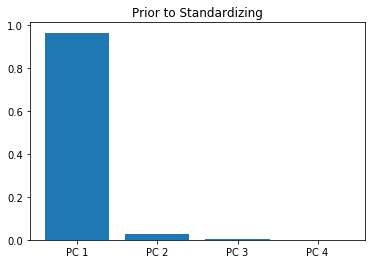

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.title("Prior to Standardizing")
plt.bar(['PC %s' %i for i in range(1,5)] ,pca.explained_variance_ratio_)

plt.show()

# zero mean scaled data

Yeilds same pca values - implying that PCA does zero mean scaling internally

In [125]:
X = crime.loc[:,features]
#((X-X.mean(0))/X.std(ddof=0)).head()
X_zeroscale = (X-X.mean(0))
X_zeroscale.head()

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

features = ['Murder','Assault','UrbanPop','Rape']
ncomps = 4
pca = PCA(n_components=ncomps)

principalComponentsRaw = pca.fit_transform(X_zeroscale.loc[:,features])

principalComponentsRawDf = pd.DataFrame(principalComponentsRaw)
#principalComponentsRawDf.columns = features
principalComponentsRawDf.head()


,0,1,2,3
0,64.802164,11.448007,-2.494933,2.407901
1,92.827450,17.982943,20.126575,-4.094047
2,124.068216,-8.830403,-1.687448,-4.353685
3,18.340035,16.703911,0.210189,-0.520994
4,107.422953,-22.520070,6.745873,-2.811826


In [107]:
pca.explained_variance_ratio_

array([  9.65534221e-01,   2.78173366e-02,   5.79953492e-03,
         8.48907879e-04])

In [108]:
print(pca.singular_values_) 

[ 586.12680172   99.48681294   45.42598251   17.37953   ]


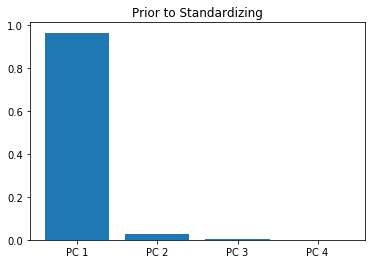

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.title("Prior to Standardizing")
plt.bar(['PC %s' %i for i in range(1,5)] ,pca.explained_variance_ratio_)

plt.show()

In [110]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
Std = StandardScaler().fit_transform(crime.loc[:,features]) 
dfStd = pd.DataFrame(Std)
dfStd.columns = features

# Compare StandardScaler to Manual Method

Be aware that numpy and pandas have different defaults for coputing standard deviation in terms of using 
sample or population standard deviation

This can be controlled by spcifying ddof inside std():

- std(ddof = 0) means population standard deviation
- std(ddof = 1) means sample standard deviation

In [111]:
X = crime.loc[:,features]
((X-X.mean(0))/X.std(ddof=0)).head()


,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [112]:
dfStd.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [113]:
pca = PCA(n_components=4)

pca.fit_transform(Std)

pca.explained_variance_ratio_

array([ 0.62006039,  0.24744129,  0.0891408 ,  0.04335752])

In [114]:
print(pca.singular_values_)  

[ 11.13607107   7.0347891    4.22234047   2.94474182]


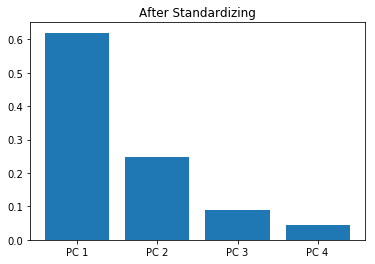

In [115]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.title("After Standardizing")
plt.bar(['PC %s' %i for i in range(1,5)] ,pca.explained_variance_ratio_)

plt.show()

In [116]:
temps = pd.read_csv(get_object_storage_file_with_credentials_e8cf95d1871249f5a07b143d737452a3('DefaultProjectrobertachesebroughibmcom', 'daily-minimum-temperatures-in-me.csv'))
temps.columns = ['Date', 'Temperature']
temps.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


# Normalizing Columns

In this case Normalizing refers to max min scaling but other DS might consider normilizing by l1 or l2 or l_inf
Probably MaxMinScaling is the most common meaning of Normalizing

From Brownlee:
 - Normalization is a rescaling of the data from the original range so that all values are within the range of 0 and 1.

 - Normalization can be useful, and even required in some machine learning algorithms when your time series data has input values with differing scales.It may be required for algorithms, like k-Nearest neighbors, which uses distance calculations and Linear Regression and Artificial Neural Networks that weight input values.

 - Normalization requires that you know or are able to accurately estimate the minimum and maximum observable values. You may be able to estimate these values from your available data. If your time series is trending up or down, estimating these expected values may be difficult and normalization may not be the best method to use on your problem.

 - A value is normalized as follows:
 - - y = (x - min) / (max - min)

In [117]:
from sklearn import preprocessing

#convert string values to float
temps['Temperature'] = temps['Temperature'].apply(pd.to_numeric, errors='coerce')

# Create x, where x the 'scores' column's values as floats
x = temps[['Temperature']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)


In [118]:
df_normalized.head()

,0
0,0.787072
1,0.680608
2,0.714829
3,0.555133
4,0.600760


# Inverting the Min_Max_Scaler

If needed, the transform can be inverted. This is useful for converting predictions back into their original scale for reporting or plotting. This can be done by calling the inverse_transform() function.

In [119]:
# inverse transform and print the first 5 rows
inversed = min_max_scaler.inverse_transform(df_normalized)
for i in range(5):
    print(inversed[i])

[ 20.7]
[ 17.9]
[ 18.8]
[ 14.6]
[ 15.8]


# Standardize Time Series Data

from Brownlee:

 - Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.

 - This can be thought of as subtracting the mean value or centering the data.

 - Like normalization, standardization can be useful, and even required in some machine learning algorithms when your time series data has input values with differing scales.

 - Standardization assumes that your observations fit a Gaussian distribution (bell curve) with a well behaved mean and standard deviation. You can still standardize your time series data if this expectation is not met, but you may not get reliable results.

 - This includes algorithms like Support Vector Machines, Linear and Logistic Regression, and other algorithms that assume or have improved performance with Gaussian data.

 - Standardization requires that you know or are able to accurately estimate the mean and standard deviation of observable values. You may be able to estimate these values from your training data.

 - A value is standardized as follows:
 - - y = (x - mean) / standard_deviation



For example, we can plot a histogram of the Minimum Daily Temperatures dataset as follows:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4bd63c6d8>]], dtype=object)

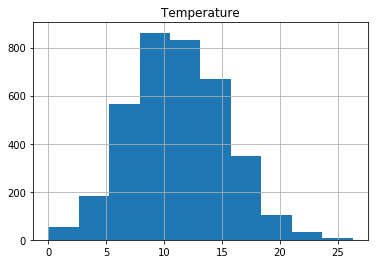

In [120]:
temps.hist()

Running the code gives the following plot that shows a Gaussian distribution of the dataset, as assumed by standardization.

In [121]:
from sklearn.preprocessing import StandardScaler
from math import sqrt

In [122]:
# Create a minimum and maximum processor object
std_scaler = StandardScaler()

x = temps[['Temperature']].values.astype(float)

# Create an object to transform the data to fit minmax processor
x_std = std_scaler.fit_transform(x)  # reuse x from above

# Run the normalizer on the dataframe
df_standardized = pd.DataFrame(x_std)


In [123]:
df_standardized.head()

,0
0,2.338883
1,1.651139
2,1.872199
3,0.840583
4,1.135330


In [124]:
# inverse transform and print the first 5 rows
inversed = std_scaler.inverse_transform(df_standardized)
for i in range(5):
    print(inversed[i])


[ 20.7]
[ 17.9]
[ 18.8]
[ 14.6]
[ 15.8]
